In [1]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer,HashingVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from bltk.langtools import remove_stopwords
from bltk.langtools import Tokenizer

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB,MultinomialNB

import re
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Data Preprocessing

In [2]:
df = pd.read_csv('daraz1.csv')
df.head()

,Name,Comment,Tag
0,Hanif R.,দাম অনুযায়ী পেন্ট ঠিক আছে এবং কোয়লিটি খুবই ভালো,Positive
1,Thoid M,এটা নিঃসন্দেহে প্রতারণা। আমি রিটার্ন করবো।,Negative
2,সুন্দর জ,দারাজ কাছ থেকে এত বাজে মানের কাপড়ের শিলি হবে...,Negative
3,Karmokar A,খারাপ না প্রোডাক্ট তা ... . একটু দাম কম হলে ভা...,Neutral
4,tauhid S,পুরাই বাটপার। প্রোডাক্ট রিটার্ন করে নাই। বাটপা...,Negative


In [3]:
df.shape

(1011, 3)

In [4]:
df = df.drop(['Name'],axis=1)
df.head()

,Comment,Tag
0,দাম অনুযায়ী পেন্ট ঠিক আছে এবং কোয়লিটি খুবই ভালো,Positive
1,এটা নিঃসন্দেহে প্রতারণা। আমি রিটার্ন করবো।,Negative
2,দারাজ কাছ থেকে এত বাজে মানের কাপড়ের শিলি হবে...,Negative
3,খারাপ না প্রোডাক্ট তা ... . একটু দাম কম হলে ভা...,Neutral
4,পুরাই বাটপার। প্রোডাক্ট রিটার্ন করে নাই। বাটপা...,Negative


In [5]:
df.shape

(1011, 2)

In [6]:
df.isna().sum()

Comment    0
Tag        0
dtype: int64

In [7]:
df.Tag.value_counts()

Positive    535
Negative    344
Neutral     132
Name: Tag, dtype: int64

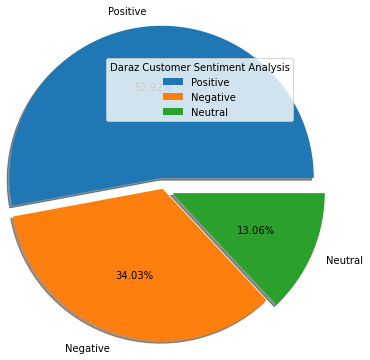

In [8]:
plt.figure(figsize=(10,5))
plt.pie(df['Tag'].value_counts(),labels=['Positive','Negative','Neutral'], autopct = "%0.2f%%",explode = [0.1,0,0.1],shadow = True,radius = 1.4,)
plt.legend(title = "Daraz Customer Sentiment Analysis")
plt.show()

In [9]:
#labelencoding
encoder = LabelEncoder()
df['Tag'] = encoder.fit_transform(df['Tag'])

In [10]:
df.Tag.value_counts()
# 0 = Negative
# 1 = Neutral
# 2 = Positive

2    535
0    344
1    132
Name: Tag, dtype: int64

# >>>Cleaning

In [11]:
def clean_sentence(sent):

    sent = re.sub('[?.`*^()!°¢܌Ͱ̰ߒנ~×Ҡߘ:ҰߑÍ|।;!,&%\'@#$>]', '', sent)
    sent = re.sub(r'(\W)(?=\1)', '', sent)
    sent = re.sub(r'https?:\/\/.*[\r\n]*', '', sent, flags=re.MULTILINE)
    sent = re.sub(r'\'', '', sent)
    sent = re.sub(r'&', '', sent) 
    sent = re.sub(r'[০-৯]', '', sent)
    sent = re.sub(r'\'', '', sent)
    sent = re.sub(r'ߑͰߑ̰ߒנ', '', sent)
    sent = re.sub(r'ߎɰߎɰߎɍ', '', sent)
    
    sent = sent.strip()
    return sent

In [12]:
#before cleanning the sentence
df.loc[15,'Comment']

'আমি চাইছিলাম  ৩৬ সাইজ  আর  আমারে  দিছে  ৩৪ সাইজ '

In [13]:
#clean all the unwanted things like numbers and puncuation
for i, sent  in enumerate(df['Comment'].tolist()):
    df.loc[i,'clean_sentence'] = clean_sentence(sent)

In [14]:
#after cleanning sentence
df.loc[15,'clean_sentence']

'আমি চাইছিলাম  সাইজ আর আমারে দিছে  সাইজ'

In [15]:
#tokenize and remove stop or unwanted word
tokenizer = Tokenizer()
remove_stopwords(tokenizer.word_tokenizer(df.loc[15,'clean_sentence']), level='hard')

['চাইছিলাম', 'সাইজ', 'আমারে', 'দিছে', 'সাইজ']

In [16]:
#remove stop or unwanted word from clean_sentence and make the comment clean_data
df['clean_data'] = [' '.join(remove_stopwords(Tokenizer().word_tokenizer(sent), level='hard')) for sent in df['clean_sentence'].tolist()]

In [17]:
df.head()

,Comment,Tag,clean_sentence,clean_data
0,দাম অনুযায়ী পেন্ট ঠিক আছে এবং কোয়লিটি খুবই ভালো,2,দাম অনুযায়ী পেন্ট ঠিক আছে এবং কোয়লিটি খুবই ভালো,দাম অনুযায়ী পেন্ট কোয়লিটি ভালো
1,এটা নিঃসন্দেহে প্রতারণা। আমি রিটার্ন করবো।,0,এটা নিঃসন্দেহে প্রতারণা আমি রিটার্ন করবো,নিঃসন্দেহে প্রতারণা রিটার্ন করবো
2,দারাজ কাছ থেকে এত বাজে মানের কাপড়ের শিলি হবে...,0,দারাজ কাছ থেকে এত বাজে মানের কাপড়ের শিলি হবে ...,দারাজ বাজে মানের কাপড়ের শিলি কখনোই আশা করিনি ...
3,খারাপ না প্রোডাক্ট তা ... . একটু দাম কম হলে ভা...,1,খারাপ না প্রোডাক্ট তা একটু দাম কম হলে ভালো হতো...,খারাপ প্রোডাক্ট একটু দাম কম ভালো হতো দাম অনুযা...
4,পুরাই বাটপার। প্রোডাক্ট রিটার্ন করে নাই। বাটপা...,0,পুরাই বাটপার প্রোডাক্ট রিটার্ন করে নাই বাটপারি...,পুরাই বাটপার প্রোডাক্ট রিটার্ন বাটপারি বাদ


In [18]:
df.shape

(1011, 4)

In [19]:
#save the csv file after cleaning
df.to_csv('daraz_clean_data.csv', encoding='utf8', index=False)

# Feature Extraction

In [20]:
#countvectorizer & tfidfVectorizer
cv = CountVectorizer(max_features=3000)
tfidf = TfidfVectorizer(max_features=3000)

In [21]:
y = df.Tag.values
print(y[0:4])

[2 0 0 1]


# >>>CountVectorizer

In [22]:
cv_X = cv.fit_transform(df.clean_data).toarray()
print(cv_X[0:4])

[[0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


# >>>TfidfVectorizer

In [23]:
tfid_X = tfidf.fit_transform(df.clean_data).toarray()
print(tfid_X[0:4])

[[0.      0.      0.      ... 0.      0.91127 0.     ]
 [0.      0.      0.      ... 0.      0.      0.     ]
 [0.      0.      0.      ... 0.      0.      0.     ]
 [0.      0.      0.      ... 0.      0.      0.     ]]


# >>>HashingVectorizer

In [24]:
hashing = HashingVectorizer(n_features=2**7)
ha_X = hashing.fit_transform(df.clean_data).toarray()
print((ha_X[0:1]))

[[ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.70710678  0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.         -0.70710678
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
  

# Model Building (CountVectorizer)

In [25]:
cv_X_train, cv_X_test, y_train, y_test = train_test_split(cv_X,y,test_size=0.3,random_state=42)

In [26]:
def model(model,i):
    print(i,'.',model,':\n')
    model.fit(cv_X_train,y_train)

    #train data
    y_pred = model.predict(cv_X_train)
    print('\tTraining Data:')
    print('\t\tAccuracy: ', round(accuracy_score(y_train,y_pred),2),end="\n")
#     print('\tf1_score: ', round(f1_score(y_train,y_pred, average='micro'),2),end="")
#     print('\tprecision_score: ', round(precision_score(y_train,y_pred, average='micro'),2),end="")
#     print('\trecall_score: ', round(recall_score(y_train,y_pred, average='micro'),2),end="")

    #test data
    y_pred = model.predict(cv_X_test)
    print('\n\tTesting Data:')
    print('\t\tAccuracy: ', round(accuracy_score(y_test,y_pred),2),end="\n")
#     print('\tf1_score: ', round(f1_score(y_test,y_pred, average='micro'),2),end="")
#     print('\tprecision_score: ', round(precision_score(y_test,y_pred, average='micro'),2),end="")
#     print('\trecall_score: ', round(recall_score(y_test,y_pred, average='micro'),2),'\n')

In [27]:
model(LogisticRegression(),1)
model(SVC(),2)
model(DecisionTreeClassifier(),3)
model(RandomForestClassifier(),4)
model(KNeighborsClassifier(),5)
model(GaussianNB(),6)
model(MultinomialNB(),7)

1 . LogisticRegression() :

	Training Data:
		Accuracy:  0.93

	Testing Data:
		Accuracy:  0.78
2 . SVC() :

	Training Data:
		Accuracy:  0.91

	Testing Data:
		Accuracy:  0.76
3 . DecisionTreeClassifier() :

	Training Data:
		Accuracy:  0.99

	Testing Data:
		Accuracy:  0.73
4 . RandomForestClassifier() :

	Training Data:
		Accuracy:  0.99

	Testing Data:
		Accuracy:  0.77
5 . KNeighborsClassifier() :

	Training Data:
		Accuracy:  0.78

	Testing Data:
		Accuracy:  0.67
6 . GaussianNB() :

	Training Data:
		Accuracy:  0.68

	Testing Data:
		Accuracy:  0.47
7 . MultinomialNB() :

	Training Data:
		Accuracy:  0.87

	Testing Data:
		Accuracy:  0.78


TfidfVectorizer

# Model Building (TfidfVectorizer)

In [28]:
tfid_X_train, tfid_X_test, y_train, y_test = train_test_split(tfid_X,y,test_size=0.3,random_state=42)

In [29]:
def model(model,i):
    print(i,'.',model,':\n')
    model.fit(tfid_X_train,y_train)

    #train data
    y_pred = model.predict(tfid_X_train)
    print('\tTraining Data:')
    print('\t\tAccuracy: ', round(accuracy_score(y_train,y_pred),2),end="\n")
#     print('\tf1_score: ', round(f1_score(y_train,y_pred, average='micro'),2),end="")
#     print('\tprecision_score: ', round(precision_score(y_train,y_pred, average='micro'),2),end="")
#     print('\trecall_score: ', round(recall_score(y_train,y_pred, average='micro'),2),end="")

    #test data
    y_pred = model.predict(tfid_X_test)
    print('\n\tTesting Data:')
    print('\t\tAccuracy: ', round(accuracy_score(y_test,y_pred),2),end="\n")
#     print('\tf1_score: ', round(f1_score(y_test,y_pred, average='micro'),2),end="")
#     print('\tprecision_score: ', round(precision_score(y_test,y_pred, average='micro'),2),end="")
#     print('\trecall_score: ', round(recall_score(y_test,y_pred, average='micro'),2),'\n')

In [30]:
model(LogisticRegression(),1)
model(SVC(),2)
model(DecisionTreeClassifier(),3)
model(RandomForestClassifier(),4)
model(KNeighborsClassifier(),5)
model(GaussianNB(),6)
model(MultinomialNB(),7)

1 . LogisticRegression() :

	Training Data:
		Accuracy:  0.88

	Testing Data:
		Accuracy:  0.79
2 . SVC() :

	Training Data:
		Accuracy:  0.95

	Testing Data:
		Accuracy:  0.78
3 . DecisionTreeClassifier() :

	Training Data:
		Accuracy:  0.99

	Testing Data:
		Accuracy:  0.7
4 . RandomForestClassifier() :

	Training Data:
		Accuracy:  0.99

	Testing Data:
		Accuracy:  0.76
5 . KNeighborsClassifier() :

	Training Data:
		Accuracy:  0.79

	Testing Data:
		Accuracy:  0.61
6 . GaussianNB() :

	Training Data:
		Accuracy:  0.7

	Testing Data:
		Accuracy:  0.46
7 . MultinomialNB() :

	Training Data:
		Accuracy:  0.83

	Testing Data:
		Accuracy:  0.75


# Model Building (HashingVectorizer)

In [31]:
ha_X_train, ha_X_test, y_train, y_test = train_test_split(ha_X,y,test_size=0.3,random_state=42)

In [32]:
def model(model,i):
    print(i,'.',model,':\n')
    model = model.fit(ha_X_train,y_train)

    #train data
    y_pred = model.predict(ha_X_train)
    print('\tTraining Data:')
    print('\t\tAccuracy: ', round(accuracy_score(y_train,y_pred),2),end="\n")
#     print('\tf1_score: ', round(f1_score(y_train,y_pred, average='micro'),2),end="")
#     print('\tprecision_score: ', round(precision_score(y_train,y_pred, average='micro'),2),end="")
#     print('\trecall_score: ', round(recall_score(y_train,y_pred, average='micro'),2),end="")

    #test data
    y_pred = model.predict(ha_X_test)
    print('\n\tTesting Data:')
    print('\t\tAccuracy: ', round(accuracy_score(y_test,y_pred),2),end="\n")
#     print('\tf1_score: ', round(f1_score(y_test,y_pred, average='micro'),2),end="")
#     print('\tprecision_score: ', round(precision_score(y_test,y_pred, average='micro'),2),end="")
#     print('\trecall_score: ', round(recall_score(y_test,y_pred, average='micro'),2),'\n')

In [33]:
model(LogisticRegression(),1)
model(SVC(),2)
model(DecisionTreeClassifier(),3)
model(RandomForestClassifier(),4)
model(KNeighborsClassifier(),5)
model(GaussianNB(),6)
# model(MultinomialNB(),7)

1 . LogisticRegression() :

	Training Data:
		Accuracy:  0.82

	Testing Data:
		Accuracy:  0.76
2 . SVC() :

	Training Data:
		Accuracy:  0.91

	Testing Data:
		Accuracy:  0.75
3 . DecisionTreeClassifier() :

	Training Data:
		Accuracy:  0.99

	Testing Data:
		Accuracy:  0.65
4 . RandomForestClassifier() :

	Training Data:
		Accuracy:  0.99

	Testing Data:
		Accuracy:  0.73
5 . KNeighborsClassifier() :

	Training Data:
		Accuracy:  0.83

	Testing Data:
		Accuracy:  0.65
6 . GaussianNB() :

	Training Data:
		Accuracy:  0.35

	Testing Data:
		Accuracy:  0.29
